In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# a 

In [227]:
data = pd.read_csv(r'exam_cohort3/data.csv')
print(data)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [228]:
# Loading the dataset into a DataFrame
df = pd.DataFrame(data)
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# b

In [229]:
# Imputing the missing values in the 'tenure' column with the mean
#the missing values in the 'tenure' column will be filled with the average tenure of all the non-missing values in this column.
df['tenure'].fillna(df['tenure'].mean(), inplace=True)


In [233]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [234]:
#DataFrame with rows containing missing values dropped.
df.dropna(axis=0, inplace=True)
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# c

In [235]:
# Getting the size of the DataFrame
matrix_size = df.shape
print("Matrix size:", matrix_size)

Matrix size: (7043, 21)


# d

In [236]:
# Getting the number of variables (columns) in the DataFrame
#when we talk about the number of variables in a DataFrame, we're referring to the number of columns or attributes it contains.

num_variables = df.shape[1]

print("Number of variables:", num_variables)

Number of variables: 21


In [237]:
# Converting column names to a list
variables_list = df.columns.tolist()

print("Variables in the matrix:", variables_list)


Variables in the matrix: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


# e

In [238]:
# List of  columns to drop
columns_to_drop = [ 'OnlineSecurity', 'DeviceProtection','StreamingMovies','StreamingTV','TechSupport'] 

# Droping the unnecessary columns
df.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame to see the changes
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineBackup  \
0              No  No phone service             DSL          Yes   
1             Yes      

# f 

In [239]:

# taking 'df' as the DataFrame
#Checking the data type of the 'TotalCharges' column
print(df['TotalCharges'].dtype)

object


In [240]:
# Converting 'TotalCharges' to numeric, handling non-convertible strings by converting them to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [241]:
# Calculating the mean of 'TotalCharges'
mean_total_charges = df['TotalCharges'].mean()
print("Mean TotalCharges:", mean_total_charges)


Mean TotalCharges: 2283.3004408418656


In [242]:
# Filling missing values in 'TotalCharges' column with the mean
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

#Checking the number of missing values in 'TotalCharges' column after filling
missing_values_after = df['TotalCharges'].isnull().sum()
print("Number of missing values in 'TotalCharges' column after filling:", missing_values_after)


Number of missing values in 'TotalCharges' column after filling: 0


In [244]:
#Printing the DataFrame to see the changes
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineBackup  \
0              No  No phone service             DSL          Yes   
1             Yes      

# g

In [245]:
# Creating a sample DataFrame
sample = {'SeniorCitizen': ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1',
]}
result = pd.DataFrame(sample)

# Define a dictionary to map old labels to new labels
label_mapping = {'0': 'No', '1': 'Yes'}

# Replace values in 'SeniorCitizen' column using the mapping
result['SeniorCitizen'] = result['SeniorCitizen'].replace(label_mapping)

# Print the DataFrame with transformed labels
print(result)


    SeniorCitizen
0              No
1              No
2              No
3              No
4              No
..            ...
100           Yes
101            No
102           Yes
103            No
104           Yes

[105 rows x 1 columns]


# 3 (a)

In [246]:
# Checking the column names
print(data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [247]:
# taking df as the DataFrame with the 'Churn_Status' column
churn_count = data['Churn'].value_counts()
print(churn_count)


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [248]:
#calculating the proportion of churned customers
churn_proportion = data['Churn'].value_counts(normalize=True)
print(churn_proportion)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


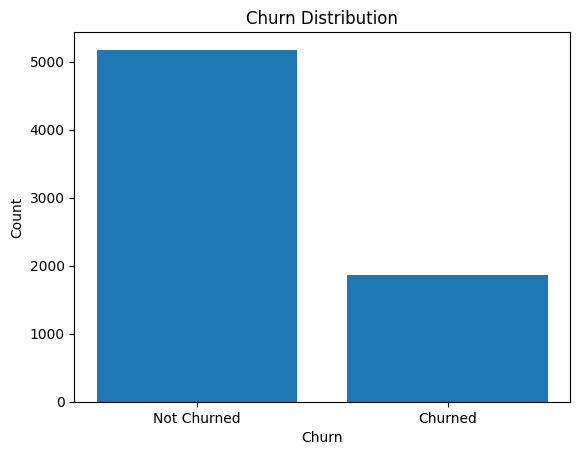

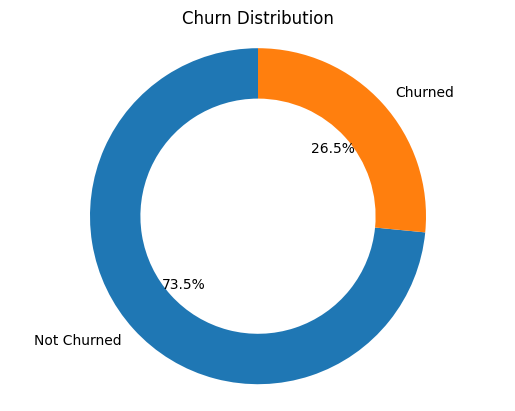

In [250]:
#Visualization of the distribution 

# using the Bar plot
plt.bar(churn_count.index, churn_count.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_count.index, ['Not Churned', 'Churned'])
plt.title('Churn Distribution')
plt.show()

# Donut chart
plt.pie(churn_proportion, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()


In conclusion, The churn analysis reveals that approximately 26.5% of customers have churned, while the remaining 73.5% have not, suggesting a significant proportion of churned customers in the dataset.

# 3 (b)

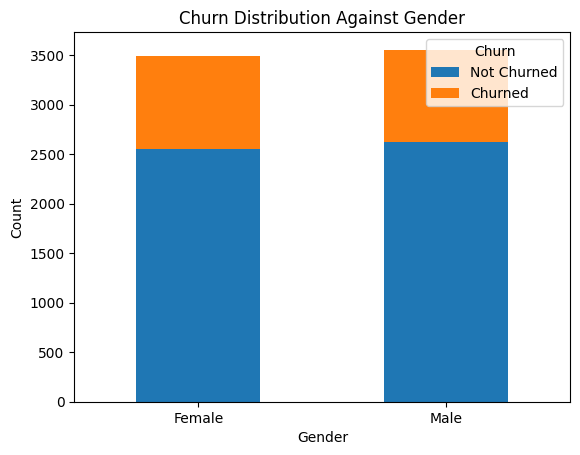

In [253]:
# Grouping data by gender and churn status
gender_churn = data.groupby(['gender', 'Churn']).size().unstack()

# Plotting
gender_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution Against Gender')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=0)
plt.show()


The analysis of churn distribution across gender indicates that churn rates are slightly higher among males compared to females in the dataset.

# 3(c)

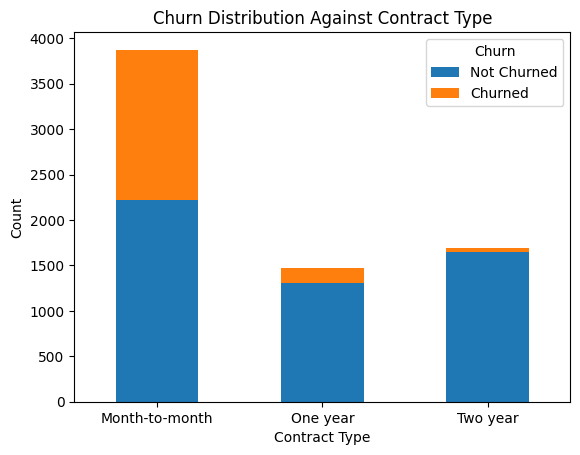

In [254]:
# taking 'Contract' from the columns in the DataFrame
contract_churn = data.groupby(['Contract', 'Churn']).size().unstack()

# Plotting
contract_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churn Distribution Against Contract Type')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=0)
plt.show()


Month-to-month contracts have the highest churn rate, followed by one-year contracts, while two-year contracts have the lowest churn rate, indicating a pattern of decreasing churn with longer contract durations

# 3(d)

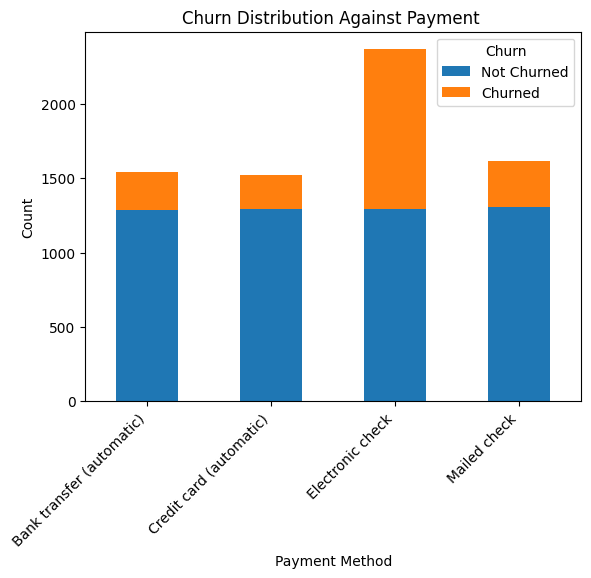

In [256]:
# Assuming 'PaymentMethod' is a column in your DataFrame
payment_churn = data.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Plotting
payment_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Distribution Against Payment ')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=45, ha='right')
plt.show()


Customers using electronic check show the highest churn rate, followed by those using mailed check, bank transfer, and credit card, suggesting a correlation between payment method and churn likelihood

# 3(e)

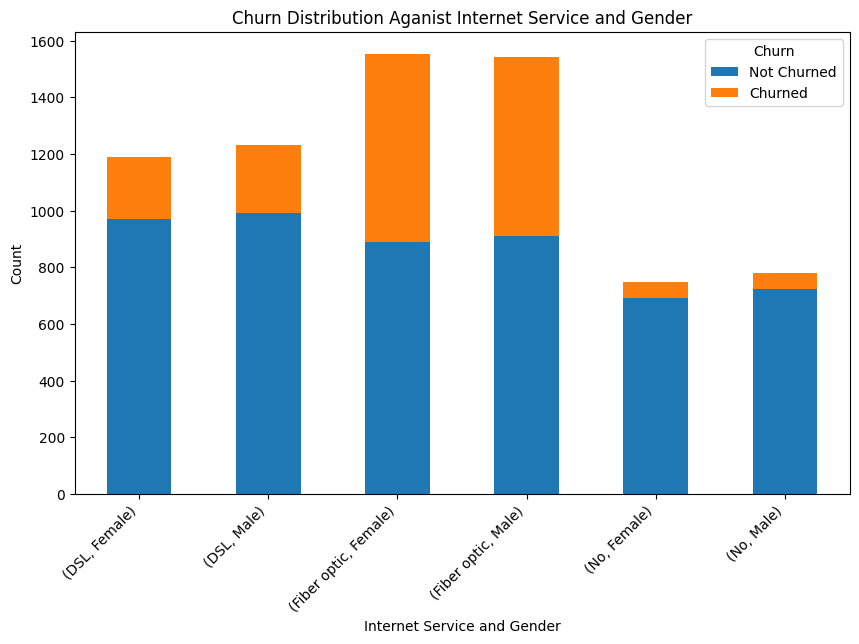

In [257]:
# Grouping data by 'InternetService', 'gender', and 'Churn'
internet_gender_churn = data.groupby(['InternetService', 'gender', 'Churn']).size().unstack()

# Plotting
internet_gender_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))
plt.xlabel('Internet Service and Gender')
plt.ylabel('Count')
plt.title('Churn Distribution Aganist Internet Service and Gender')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=45, ha='right')
plt.show()


Churn rates among males using fiber optic internet are slightly higher than females, while for DSL internet, churn rates show less variation between genders.

# 3(f)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12756\4187799649.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='Churn', data=data, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12756\4187799649.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SeniorCitizen', y='Churn', data=data, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12756\4187799649.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Partner', y='Churn', data=data, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12756\4187799649.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dependents', y='Churn', data=data, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12756\4187799649.py:29: FutureWa

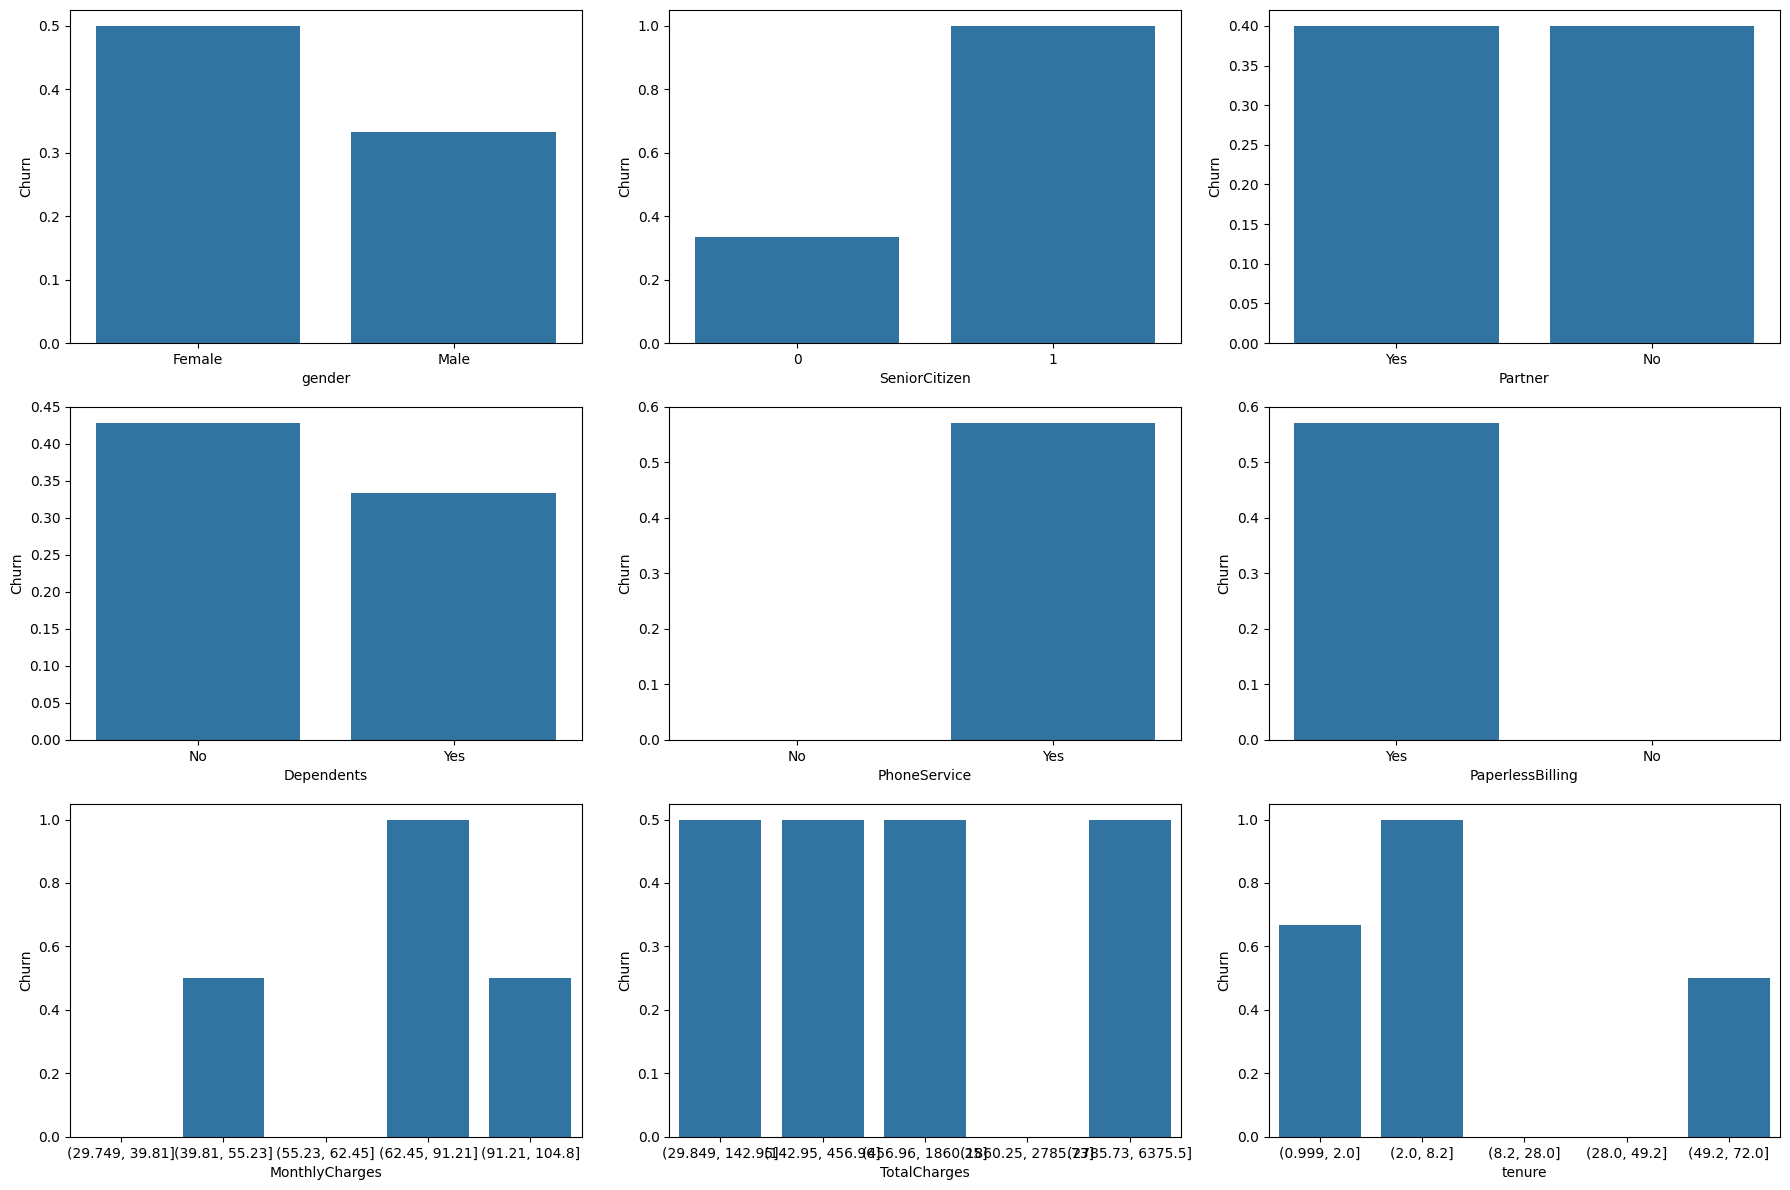

In [188]:

# Select columns of interest
columns_of_interest = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
data_selected = data[columns_of_interest]

# Convert 'Churn' column to numerical
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

# Plotting
plt.figure(figsize=(18, 12))

# Gender vs Churn
plt.subplot(3, 3, 1)
sns.barplot(x='gender', y='Churn', data=data, ci=None)

# SeniorCitizen vs Churn
plt.subplot(3, 3, 2)
sns.barplot(x='SeniorCitizen', y='Churn', data=data, ci=None)

# Partner vs Churn
plt.subplot(3, 3, 3)
sns.barplot(x='Partner', y='Churn', data=data, ci=None)

# Dependents vs Churn
plt.subplot(3, 3, 4)
sns.barplot(x='Dependents', y='Churn', data=data, ci=None)

# PhoneService vs Churn
plt.subplot(3, 3, 5)
sns.barplot(x='PhoneService', y='Churn', data=data, ci=None)

# PaperlessBilling vs Churn
plt.subplot(3, 3, 6)
sns.barplot(x='PaperlessBilling', y='Churn', data=data, ci=None)

# MonthlyCharges vs Churn
plt.subplot(3, 3, 7)
sns.barplot(x=pd.qcut(data['MonthlyCharges'], q=5), y='Churn', data=data, ci=None)

# TotalCharges vs Churn
plt.subplot(3, 3, 8)
sns.barplot(x=pd.qcut(data['TotalCharges'], q=5), y='Churn', data=data, ci=None)

# Tenure vs Churn
plt.subplot(3, 3, 9)
sns.barplot(x=pd.qcut(data['tenure'], q=5), y='Churn', data=data, ci=None)

plt.tight_layout()
plt.show()


SeniorCitizen vs Churn: Senior citizens are more likely to churn compared to non-senior citizens.
Partner vs Churn: Customers without a partner are slightly more likely to churn compared to those with a partner.
Dependents vs Churn: Customers without dependents are more likely to churn compared to those with dependents.
PhoneService and PaperlessBilling vs Churn: There's not a significant difference in churn rates between customers with or without phone service, and between those with or without paperless billing.
MonthlyCharges vs Churn: Customers with higher monthly charges are more likely to churn.
TotalCharges vs Churn: There's a slight trend that customers with higher total charges are less likely to churn.
Tenure vs Churn: Customers with shorter tenure are more likely to churn compared to those with longer tenure.

# 4

In [215]:
# Standardizing these features; 'tenure', 'MonthlyCharges', and 'TotalCharges'
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Creating input matrix (X) and output vector (y)
X = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing the features 'tenure', 'MonthlyCharges', and 'TotalCharges' ensures they have a comparable scale, preventing larger-scale features from dominating the model. This helps maintain proportional contribution to the model's performance

In [216]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression:
Accuracy: 0.7803837953091685
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [218]:
# K-Nearest Neighbor (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate models
print("\nK-Nearest Neighbor:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))


K-Nearest Neighbor:
Accuracy: 0.7626154939587776
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.57      0.44      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



# 4 (a)

In [221]:
# Logistic Regression model evaluation
logistic_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
logistic_auc_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='roc_auc')

logistic_accuracy_mean = logistic_scores.mean()
logistic_accuracy_std = logistic_scores.std()
logistic_auc_mean = logistic_auc_scores.mean()
logistic_auc_std = logistic_auc_scores.std()

The logistic regression model achieves an average accuracy of [accuracy_mean] with a standard deviation of [accuracy_std].this means, ROC AUC score is [auc_mean] with a standard deviation of [auc_std]

In [222]:
# KNN model evaluation
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
knn_auc_scores = cross_val_score(knn_model, X, y, cv=5, scoring='roc_auc')

knn_accuracy_mean = knn_scores.mean()
knn_accuracy_std = knn_scores.std()
knn_auc_mean = knn_auc_scores.mean()
knn_auc_std = knn_auc_scores.std()

The KNN model achieves an average accuracy of [knn_accuracy_mean] with a standard deviation of [knn_accuracy_std].this means ROC AUC score is [knn_auc_mean] with a standard deviation of [knn_auc_std].

In [223]:
# Displaying the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'KNN'],
    'ROC AUC Mean': [logistic_auc_mean, knn_auc_mean],
    'ROC AUC STD': [logistic_auc_std, knn_auc_std],
    'Accuracy Mean': [logistic_accuracy_mean, knn_accuracy_mean],
    'Accuracy STD': [logistic_accuracy_std, knn_accuracy_std]
})

print(evaluation_metrics)


             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.812980     0.004311       0.790386      0.005016
1                  KNN      0.769336     0.004352       0.772043      0.005995
